# 杭州市萧山区项目`WRF-CMAQ`模拟分析
## Model Evaluation : `chem-obs data`

---
*@author: Evan*\
*@date: 2023-08-29*

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeom
from shapely.prepared import prep
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
        "font.family":'Times New Roman',
        "mathtext.fontset":'stix',
        "font.serif": ['Times New Roman'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
import ModelEvaLib as me
from namelist import *

In [4]:
def polygon_to_mask(polygon, x, y):
    '''
    Generate a mask array of points falling into the polygon
    '''
    x = np.atleast_1d(x)
    y = np.atleast_1d(y)
    mask = np.zeros(x.shape, dtype=bool)

    # if each point falls into a polygon, without boundaries
    prepared = prep(polygon)
    for index in np.ndindex(x.shape):
        point = sgeom.Point(x[index], y[index])
        if prepared.contains(point):
            mask[index] = True

    return mask

## 杭州市全部

In [5]:
ds1 = xr.open_dataset(cmaqfile)

sim1 = ds1['O3'][:,0,:,:]

shp = gpd.read_file(shphz)
for i in range(np.size(ds1.latitude,0)):
    for j in range(np.size(ds1.latitude,1)):
        if polygon_to_mask(shp.geometry[0],ds1.longitude[i,j],ds1.latitude[i,j])==False:
            sim1[:,i,j] = np.nan

sim1 = np.nanmean(np.nanmean(sim1,1),1)

sim1.shape

(744,)

In [6]:
obsxls = pd.read_excel(obshz)
obs = obsxls['O3']
obs.shape

(744,)

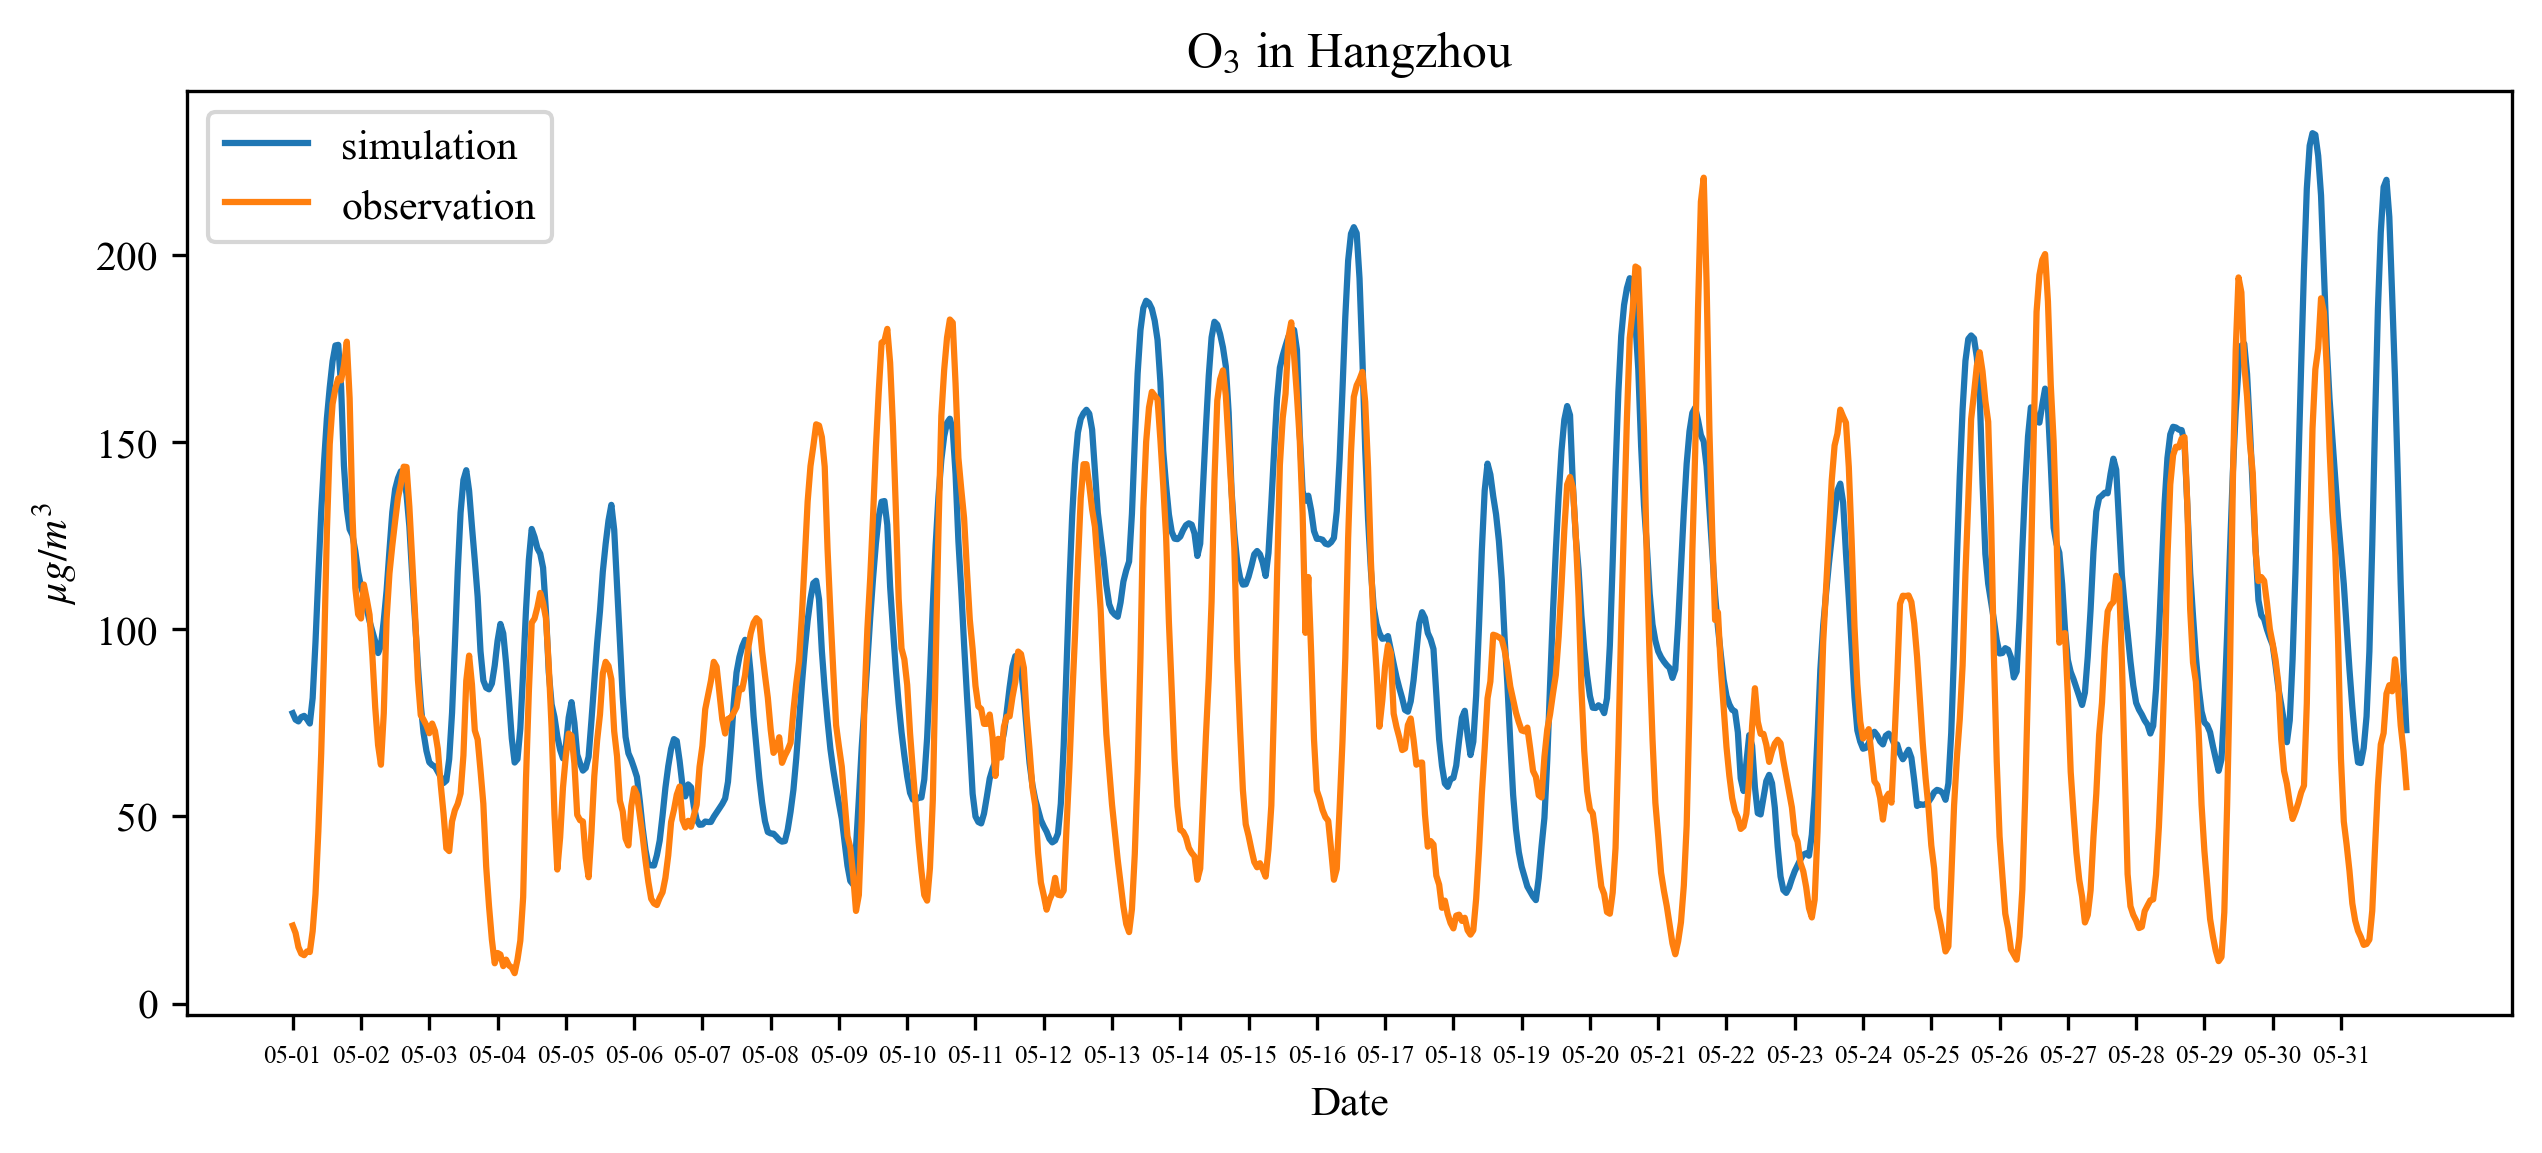

In [7]:
ax = me.linechart(sim1, obs, timestart, timeend)

ax.legend(loc=2)
ax.set_title('O$_3$ in Hangzhou')
ax.set_xlabel('Date')
ax.set_ylabel('$\mu$$g/m^3$')
plt.show()

In [8]:
df = pd.DataFrame({'sim':sim1, 'obs':obs})
me.evaluation_frame(obs, sim1, df)

,param,value
0,obs mean,81.438657
1,sim mean,102.732399
2,R,0.637697
3,MB,21.293742
4,RMSE,43.542197
5,IOA,0.756015


## 萧山区

In [9]:
ds2 = xr.open_dataset(cmaqfile)
sim2 = ds2['O3'][:,0,:,:]

shp = gpd.read_file(shpxs)
for i in range(np.size(ds2.latitude,0)):
    for j in range(np.size(ds2.latitude,1)):
        if polygon_to_mask(shp.geometry[0],ds2.longitude[i,j],ds2.latitude[i,j])==False:
            sim2[:,i,j] = np.nan
            
sim2 = np.nanmean(np.nanmean(sim2,1),1)

sim2.shape

(744,)

In [11]:
obsxls = pd.read_excel('D:/data/Project_Xiaoshan/202305/obsdata/sites_2305/杭州-城厢镇_2023.xlsx')
obs = obsxls['O3']
obs.shape

(744,)

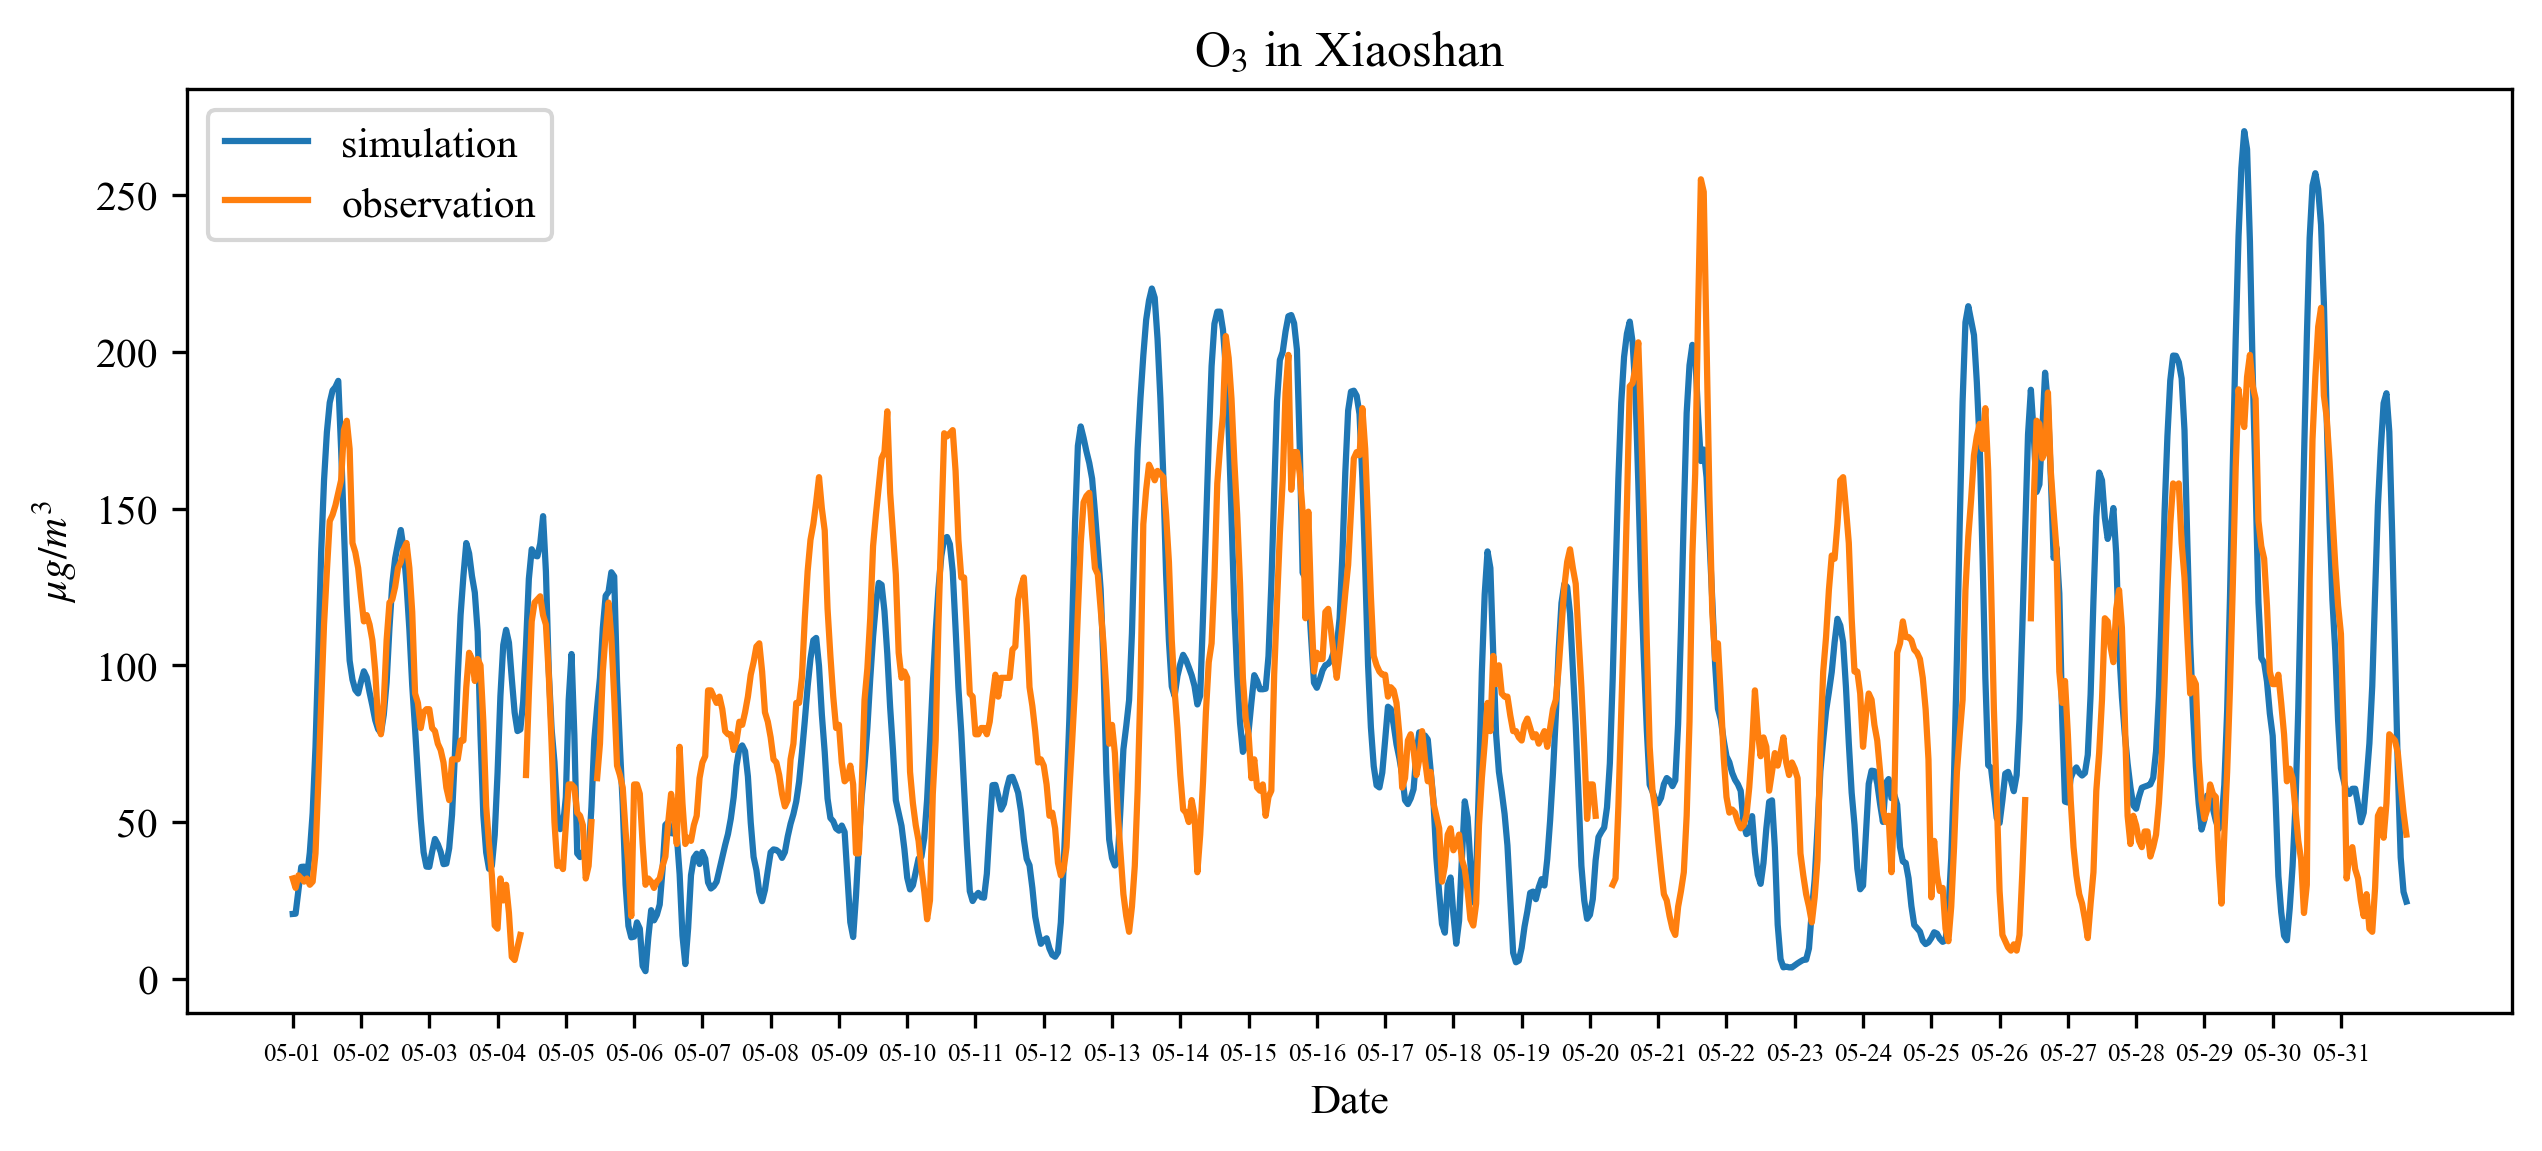

In [12]:
ax = me.linechart(sim2, obs, timestart, timeend)

ax.legend(loc=2)
ax.set_title('O$_3$ in Xiaoshan')
ax.set_xlabel('Date')
ax.set_ylabel('$\mu$$g/m^3$')
plt.show()

In [13]:
df = pd.DataFrame({'sim':sim2, 'obs':obs})
me.evaluation_frame(obs, sim2, df)

,param,value
0,obs mean,88.559783
1,sim mean,86.487091
2,R,0.661704
3,MB,-2.072692
4,RMSE,43.527553
5,IOA,0.800819
